<b><font color='darkblue'>Unsupervised Learning for User Clustering</font></b>

For this project, each team member has been assigned a specific objective. I, Jie Luo (jiemluo), am focused on Unsupervised Learning, where my task is to identify patterns and clusters among users. These insights will help us recommend personalized learning paths tailored to the unique needs and behaviors of each user.

In this notebook, I will perform unsupervised learning to identify common patterns and clusters among users. This can help recommend personalized learning paths for new users.

<b><font color='darkblue'>Table of Contents</font></b>
1. Load the Raw Dataset
2. Data Processing
    - Encode Categorical Variables
    - Feature Scaling
3. K-Means Clustering
    - Evaluating optimal number of clusters
    - Perform K-Meas Clustering on Original Scaled Data
    - Applying Dimensionality Reduction with PCA
    - Evaluation by calculating Silhouette Scores
    - Applying t-SNE with Clustering Visualization
4. Other Clustering Algorithms
    - Gaussian Mixture Models (GMMs)
    - Hierarchical Agglomerative Clustering
    - DBSCAN
    - Applying t-SNE with Clustering Visualization
5. Evaluation
Compare all the models implemented with Silhouette Score
6. Cluster Analysis
    - Analyzing clusters based on feature means

### <b>Part I. Load the Raw Dataset</b>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# For dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# For evaluation metrics
from sklearn.metrics import silhouette_score

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload the final.csv file from local
from google.colab import files
uploaded = files.upload()

Saving df_final.csv to df_final.csv


In [3]:
# Load the CSV into a pandas DataFrame
df = pd.read_csv('df_final.csv')

In [4]:
# Check the unique column names
unique_columns = set(df.columns)
unique_columns

{'Age',
 'Count_Learning_Methods',
 'Count_Online_Resources',
 'Employment_Status',
 'Field_Working_Education',
 'Field_Working_Others',
 'Field_Working_Self-employed',
 'Field_Working_Software development and IT',
 'Field_Working_unemployed',
 'High_Expectation',
 'Highest_Degree_Ordinal',
 'Hours_Learning_Weekly',
 'In-person Events',
 'Income',
 'Industry_Experience',
 'Intuition_Encoded',
 'Job_Status_Expecation(Objective2)',
 'Job_Status_Income(Objective1)',
 'Laid_Off_Potential',
 'Listen_Podcasts',
 'Money_Spent',
 'Months_Finding_New_Job',
 'Months_Programming',
 'Replacable_Job_Potential',
 'Study_Field_Computer-related',
 'Study_Field_Not applicable',
 'Study_Field_Other Science & Engineering',
 'Study_Field_Others',
 'Youtube_Channels'}

In [5]:
# Drop the target columns for supervised learning objectives from the DataFrame
df = df.drop(['Job_Status_Expecation(Objective2)', 'Job_Status_Income(Objective1)'], axis=1)

In [6]:
# Display the first three rows of the DataFrame
df.head(3)

,Intuition_Encoded,Age,Income,Employment_Status,High_Expectation,Industry_Experience,Highest_Degree_Ordinal,Hours_Learning_Weekly,Months_Programming,Money_Spent,...,Replacable_Job_Potential,Study_Field_Computer-related,Study_Field_Not applicable,Study_Field_Other Science & Engineering,Study_Field_Others,Field_Working_Education,Field_Working_Others,Field_Working_Self-employed,Field_Working_Software development and IT,Field_Working_unemployed
0,3.0,35.0,2.0,1.0,1.0,1.0,4.0,2.0,24.0,5000.0,...,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,27.0,2.0,1.0,1.0,1.0,4.0,10.0,50.0,200.0,...,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,24.0,2.0,1.0,1.0,1.0,6.0,5.0,36.0,10500.0,...,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### <b>Part II. Data Processing</b>
- Encode Categorical Variables
- Feature Scaling

<b><font color='darkblue'>Encode Categorical Variables</font></b>

<b>Note</b>: Normally, encoding categorical variables is necessary because clustering algorithms like K-Means and Gaussian Mixture Models rely on numerical data for distance calculations (e.g., Euclidean distance). Categorical variables, especially nominal categories like 'Employment_Status' with values such as 'Employed', 'Unemployed', etc., cannot be directly used in these computations. However, since you've already performed one-hot encoding or ordinal encoding on your categorical variables, and your DataFrame df now consists entirely of numerical columns, we can skip the 'Encode Categorical Variables' step in the data preprocessing.

<b><font color='darkblue'>Feature Scaling</font></b>

Clustering algorithms like K-Means use distance metrics to assign data points to clusters. If one feature has a much larger scale than others, it can disproportionately influence the distance calculations. In this case, we will need to adjust the data to a common scale. The way we are using is by scaling transforms features to have a mean of zero and a standard deviation of one.

In [7]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Create a DataFrame with scaled features (optional)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

In [8]:
# Display the first three rows of the DataFrame
scaled_df.head(3)

,Intuition_Encoded,Age,Income,Employment_Status,High_Expectation,Industry_Experience,Highest_Degree_Ordinal,Hours_Learning_Weekly,Months_Programming,Money_Spent,...,Replacable_Job_Potential,Study_Field_Computer-related,Study_Field_Not applicable,Study_Field_Other Science & Engineering,Study_Field_Others,Field_Working_Education,Field_Working_Others,Field_Working_Self-employed,Field_Working_Software development and IT,Field_Working_unemployed
0,0.434753,0.681805,1.183217,0.902157,0.728434,2.807225,-0.109237,-0.727815,0.077068,0.201175,...,-1.590870,2.104497,-0.582391,-0.615887,-0.635260,-0.24018,1.274653,-0.008483,-0.443114,-0.816962
1,0.434753,-0.024449,1.183217,0.902157,0.728434,2.807225,-0.109237,-0.116663,0.318158,-0.020002,...,0.335081,2.104497,-0.582391,-0.615887,-0.635260,-0.24018,-0.784527,-0.008483,2.256755,-0.816962
2,0.434753,-0.289295,1.183217,0.902157,0.728434,2.807225,0.939954,-0.498633,0.188340,0.454605,...,0.335081,-0.475173,-0.582391,-0.615887,1.574159,-0.24018,-0.784527,-0.008483,2.256755,-0.816962


### <b>Part III. K-Means Clustering</b>
- Evaluating optimal number of clusters
- Perform K-Meas Clustering on Original Scaled Data
- Applying Dimensionality Reduction with PCA
- Applying Dimensionality Reduction with t-SNE
- Evaluation by calculating Silhouette Scores

<b><font color='darkblue'>Evaluating optimal number of clusters</font></b>


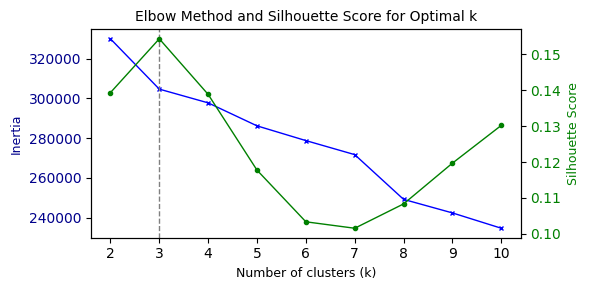

In [9]:
# Function to plot the Elbow Method and Silhouette Scores on the same plot with two y-axes
def evaluate_clustering(scaled_data, max_k=10):
    inertia = []
    silhouette_scores = []
    K = range(2, max_k + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette = silhouette_score(scaled_data, labels)
        silhouette_scores.append(silhouette)

    # Create a figure with a shared x-axis
    fig, ax1 = plt.subplots(figsize=(6, 3))

    # Plot Inertia (Elbow Method) on the left y-axis
    ax1.plot(K, inertia, 'bx-', label='Inertia (Elbow Method)', lw=1, markersize=3)
    ax1.set_xlabel('Number of clusters (k)', fontsize=9)
    ax1.set_ylabel('Inertia', color='darkblue', fontsize=9)
    ax1.tick_params(axis='y', labelcolor='darkblue')

    # Create a second y-axis to plot Silhouette Score
    ax2 = ax1.twinx()
    ax2.plot(K, silhouette_scores, 'go-', label='Silhouette Score', lw=1, markersize=3)
    ax2.set_ylabel('Silhouette Score', color='green', fontsize=9)
    ax2.tick_params(axis='y', labelcolor='green')

    # Add a vertical dashed line at cluster = 3
    ax1.axvline(x=3, color='grey', linestyle='--', lw=1)

    # Add a title to the plot
    plt.title('Elbow Method and Silhouette Score for Optimal k', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Evaluate clustering to find optimal k
evaluate_clustering(scaled_features, max_k=10)


<b><font color='darkgreen'>Insights:</font></b>

- Elbow Method Plot: The elbow point (the point where the rate of decrease in inertia slows down significantly) is around k = 3 or k = 4. This suggests that after 3 clusters, the additional gain in clustering quality decreases.

- Silhouette Score Plot: The silhouette score peaks at k = 3, indicating that this is the most optimal number of clusters in terms of how well-separated the clusters are. A higher silhouette score represents better-defined clusters.

- Based on both the silhouette score and elbow method, <b>the optimal number of clusters appears to be k = 3</b>. This provides the best trade-off between well-defined clusters (from the silhouette score) and reduced inertia (from the elbow method).

In [10]:
# Define the optimal_k as 3
optimal_k = 3

<b><font color='darkblue'>Perform K-Meas Clustering on Original Scaled Data</font></b>


In [11]:
# Clustering on original scaled data
kmeans_original = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_original_labels = kmeans_original.fit_predict(scaled_features)

# Calculate Silhouette Score
silhouette_original = silhouette_score(scaled_features, kmeans_original_labels)
print(f'Silhouette Score for K-Means on original data: {silhouette_original}')


Silhouette Score for K-Means on original data: 0.15437308497509747


<b><font color='darkblue'>Applying PCA</font></b>

We will start with reduce dimensions to 2 by applying PCA.

In [12]:
# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])


In [13]:
# Check the amount of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained_variance[0]:.2%}")
print(f"Variance explained by PC2: {explained_variance[1]:.2%}")
print(f"Total variance explained by the first two PCs: {explained_variance.sum():.2%}")


Variance explained by PC1: 14.51%
Variance explained by PC2: 10.28%
Total variance explained by the first two PCs: 24.79%


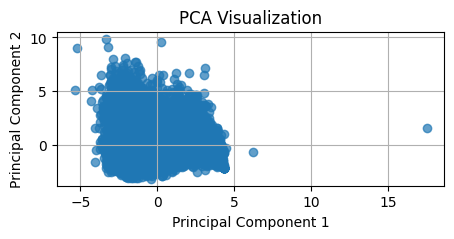

In [14]:
# Plot the PCA results
plt.figure(figsize=(5, 2))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


<b><font color='darkgreen'>Insights:</font></b>

- Information Loss: Retaining only ~25% of the variance suggests that a significant amount of information is lost when reducing the data to two dimensions. This may limit the effectiveness of visualizations and could obscure underlying patterns or clusters in the data.

- Data Complexity: The relatively low variance captured by the first two components indicates that the variance is spread out across many features. Important information is distributed among several principal components rather than being concentrated in the first few.

<b>To get a better usage of PCA, I will increase the number of principal components and try to capture a sufficient amount of the total variance.</b>

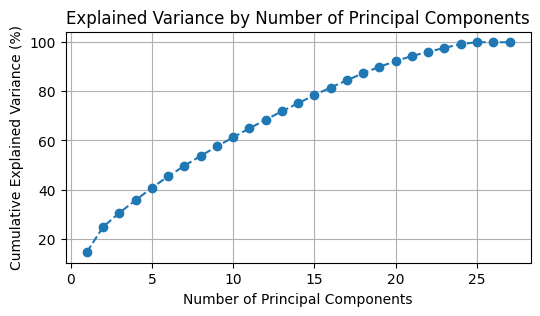

In [15]:
# Generate cumulative explained variance plot
pca_full = PCA().fit(scaled_features)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100
plt.figure(figsize=(6, 3))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


<b><font color='darkgreen'>Insights:</font></b>

After around 15 components, the curve flattens, indicating diminishing returns as additional components contribute less new information. By selecting around 15 components, we can capture approximately 80 of the variance, striking a balance between dimensionality reduction and retaining sufficient variance for meaningful analysis, while avoiding unnecessary complexity from including too many components.

In [16]:
# Reduce dimensions to 15 components
pca_n = PCA(n_components=15, random_state=42)
pca_components_n = pca_n.fit_transform(scaled_features)


In [17]:
# Access the explained variance ratio
explained_variance_ratio_15 = pca_n.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance_15 = np.cumsum(explained_variance_ratio_15)

# Get the cumulative variance explained by the first 15 components
total_cumulative_variance = cumulative_variance_15[-1] * 100  # Multiply by 100 to get percentage

# Print the result
print(f"The cumulative variance for n_components=15 is {total_cumulative_variance:.2f}%")

The cumulative variance for n_components=15 is 78.48%


<b><font color='darkgreen'>Insights:</font></b>

78.48% variance explained with 15 components is generally acceptable.

In [18]:
# Perform K-Means clustering on the PCA-reduced data
kmeans_pca_15 = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca_labels_15 = kmeans_pca_15.fit_predict(pca_components_n)

# Calculate Silhouette Score
silhouette_pca_15 = silhouette_score(pca_components_n, kmeans_pca_labels_15)
print(f'Silhouette Score for K-Means on PCA-reduced data (15 components): {silhouette_pca_15}')

Silhouette Score for K-Means on PCA-reduced data (15 components): 0.20081165896748351


<b><font color='darkgreen'>Insights:</font></b>

The <b>silhouette score</b> measures how well clusters are separated and how similar the points within a cluster are. It ranges from -1 to 1. <b>A score of 0.2008 is relatively low</b>, indicating that the clusters are not well-separated. Compared to <b>the Silhouette Score for K-Means on the original data (0.1544)</b>, PCA has provided some improvement, but the silhouette score is still low, meaning the dimensionality reduction hasn't significantly enhanced the clustering. To gain further insights and visualize the local relationships between data points, I want to implement t-SNE, as it is more effective at preserving local structures in high-dimensional data, which may reveal patterns that PCA and K-Means miss.

<b><font color='darkblue'>Applying t-SNE</font></b>

Alternatively, we can apply t-Distributed Stochastic Neighbor Embedding (t-SNE).

In [19]:
# Perform t-SNE on the original scaled data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

# Create DataFrame
tsne_df = pd.DataFrame(tsne_components, columns=['TSNE1', 'TSNE2'])

# Perform K-Means clustering on the original scaled data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
tsne_df['Cluster'] = kmeans_labels

In [20]:
# Perform t-SNE on the PCA-reduced data
tsne_pca = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_pca_components = tsne_pca.fit_transform(pca_components_n)

# Create DataFrame
tsne_pca_df = pd.DataFrame(tsne_pca_components, columns=['TSNE1', 'TSNE2'])

# Perform K-Means clustering on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_components_n)

# Add cluster labels to the DataFrame
tsne_pca_df['Cluster'] = kmeans_pca_labels


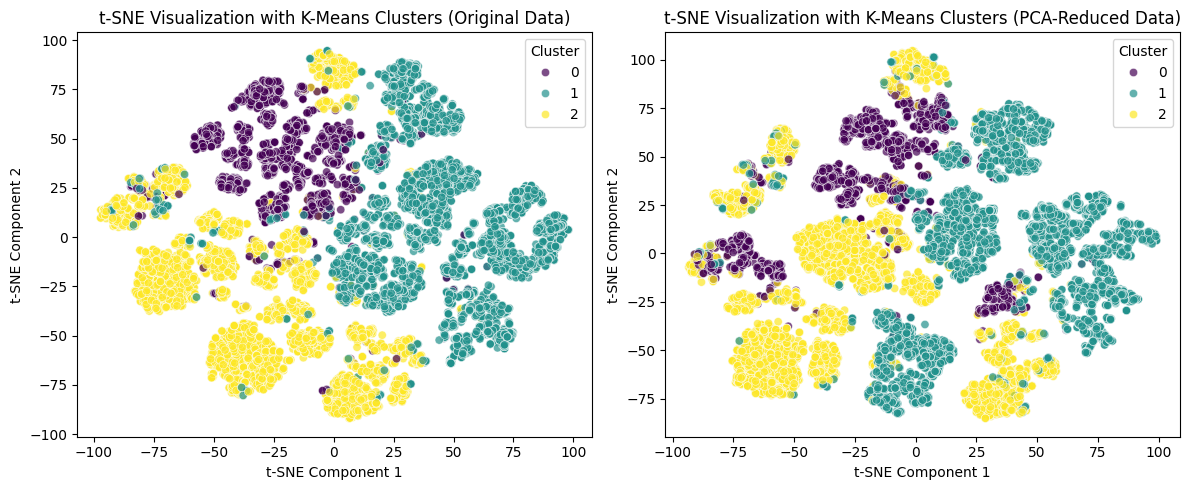

In [21]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: t-SNE Visualization on Original Scaled Data
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='viridis',
    alpha=0.7,
    ax=ax1
)
ax1.set_title('t-SNE Visualization with K-Means Clusters (Original Data)')
ax1.set_xlabel('t-SNE Component 1')
ax1.set_ylabel('t-SNE Component 2')
ax1.legend(title='Cluster')

# Plot 2: t-SNE Visualization on PCA-Reduced Data
sns.scatterplot(
    data=tsne_pca_df,
    x='TSNE1',
    y='TSNE2',
    hue='Cluster',
    palette='viridis',
    alpha=0.7,
    ax=ax2
)
ax2.set_title('t-SNE Visualization with K-Means Clusters (PCA-Reduced Data)')
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.legend(title='Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

<b><font color='darkgreen'>Insights:</font></b>

After implementing t-SNE on both the original and PCA-reduced data, we can compare the clustering results side by side. In both visualizations, the teal (Cluster 2) and purple (Cluster 0) clusters remain relatively well-defined, though some overlap is still present, particularly with yellow (Cluster 1). Interestingly, the t-SNE plot on the PCA-reduced data (right) shows a more fragmented structure, where the clusters appear more spread out and disjointed compared to the original data (left), where the clusters are more compact. This fragmentation could indicate that while PCA helped reduce dimensionality, it may have discarded some subtle variations in the data that were important for defining cluster boundaries. Overall, t-SNE is effective in visualizing local patterns, but the PCA-reduced t-SNE plot suggests that using fewer components may not always yield clearer separations.

<b>Next Step:</b>

I am going to implement other clustering algorithms like Gaussian Mixture Models (GMMs), Hierarchical Agglomerative Clustering, and DBSCAN. While K-Means is a widely used and straightforward clustering algorithm, it makes certain assumptions about the data that may not always hold true. Exploring different clustering methods can provide additional insights.

### <b>Part IV. Other Clustering Algorithms</b>
- Gaussian Mixture Models (GMMs)
- Hierarchical Agglomerative Clustering
- DBSCAN
- Applying t-SNE with Clustering Visualization

<b><font color='darkblue'>Gaussian Mixture Models (GMMs)</font></b>
- GMMs are probabilistic models that assume the data is generated from a mixture of several Gaussian distributions with unknown parameters.
- Unlike K-Means, which assigns each point to the nearest cluster center, GMMs assign probabilities to each point belonging to each cluster.

In [22]:
from sklearn.mixture import GaussianMixture

# Decide on the number of components (clusters)
n_components = optimal_k  # Use the same k as in K-Means or explore different values

# Fit the GMM
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)

# Calculate Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_gmm = silhouette_score(scaled_features, gmm_labels)
print(f'Silhouette Score for GMM: {silhouette_gmm:.4f}')

# Visualization (e.g., using t-SNE)
tsne_df['GMM_Cluster'] = gmm_labels

Silhouette Score for GMM: 0.1371


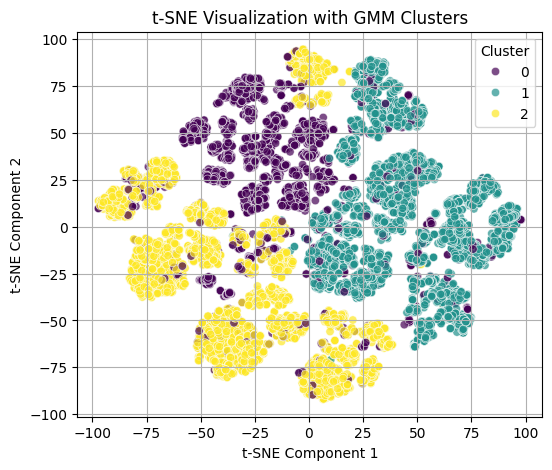

In [23]:
# Plot the t-SNE results with GMM cluster labels
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='GMM_Cluster',
    palette='viridis',
    alpha=0.7
)
plt.title('t-SNE Visualization with GMM Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

<b><font color='darkgreen'>Insights:</font></b>

<b>The Silhouette Score for GMM (Gaussian Mixture Model) is 0.1371</b>, which is relatively low, indicating that the clustering results are not well-separated or cohesive. In the t-SNE visualization, we can observe that the teal (Cluster 2) and purple (Cluster 0) clusters have significant overlap with the yellow (Cluster 1), which suggests that GMM struggled to form clear, distinct boundaries between the clusters. GMM uses a probabilistic approach to assign points to clusters, which could lead to more flexibility in cluster assignments, but in this case, it results in ambiguity and poor separation.

<b><font color='darkblue'>Hierarchical Agglomerative Clustering</font></b>
- Builds a hierarchy of clusters by recursively merging or splitting clusters.

In [24]:
from sklearn.cluster import AgglomerativeClustering

# Fit the model
agglo = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(scaled_features)

# Calculate Silhouette Score
silhouette_agglo = silhouette_score(scaled_features, agglo_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo:.4f}')

# Visualization
tsne_df['Agglo_Cluster'] = agglo_labels


Silhouette Score for Agglomerative Clustering: 0.1201


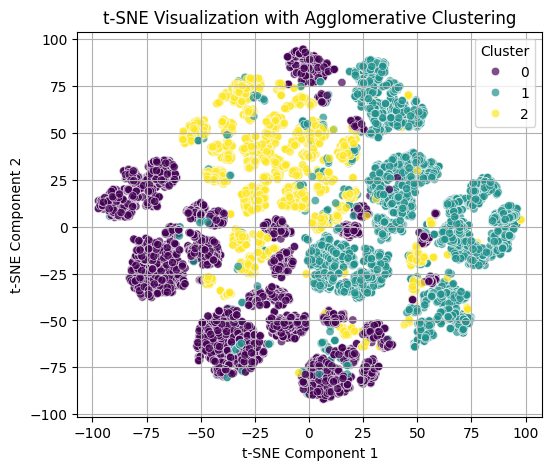

In [25]:
# Plot the t-SNE results with Agglomerative Clustering labels
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='Agglo_Cluster',
    palette='viridis',
    alpha=0.7
)
plt.title('t-SNE Visualization with Agglomerative Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

<b><font color='darkgreen'>Insights:</font></b>

<b>The Silhouette Score for Agglomerative Clustering is 0.1201</b>, which is relatively low, indicating poor cluster separation and cohesion. From the t-SNE visualization, we can see that the clusters have significant overlap, especially between the yellow (Cluster 1) and the other clusters (purple and teal). This suggests that Agglomerative Clustering has struggled to clearly differentiate between the data points. The low silhouette score confirms that many points are near the boundaries of their clusters or may have been misclassified. Overall, while Agglomerative Clustering may identify some structure in the data, the results here show that it does not perform well on this dataset, and further adjustments or different algorithms may yield better results.

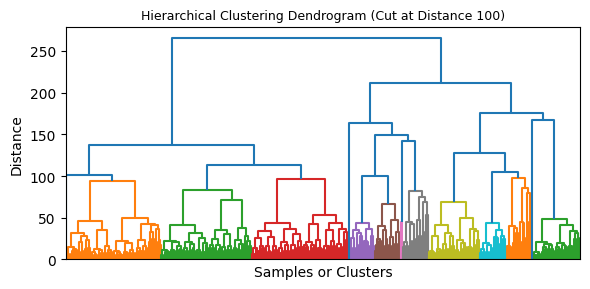

In [26]:
import scipy.cluster.hierarchy as shc

# Generate the linkage matrix
linkage_matrix = shc.linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(6, 3))  # Adjust the figure size
shc.dendrogram(
    linkage_matrix,
    color_threshold=100,   # Cut-off threshold at distance 100
    truncate_mode='level',  # Show only the top 5 levels of the hierarchy
    p=10,  # Show only the last 10 merged clusters (adjust if needed)
    leaf_rotation=45,  # Rotate labels to make them more readable
    leaf_font_size=10,  # Font size for the leaf labels
    no_labels=True
)
plt.title('Hierarchical Clustering Dendrogram (Cut at Distance 100)', fontsize=9)
plt.xlabel('Samples or Clusters')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

<b><font color='darkblue'>DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</font></b>
- Clusters data based on the density of data points.
- Identifies core samples in high-density regions and expands clusters from them.

In [27]:
from sklearn.cluster import DBSCAN

# Set parameters
eps_value = 0.5  # You may need to adjust this
min_samples_value = 5  # You may need to adjust this

# Fit the model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Calculate Silhouette Score (excluding noise points labeled as -1)
from sklearn.metrics import silhouette_score
labels_without_noise = dbscan_labels[dbscan_labels != -1]
features_without_noise = scaled_features[dbscan_labels != -1]
if len(set(labels_without_noise)) > 1:
    silhouette_dbscan = silhouette_score(features_without_noise, labels_without_noise)
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}')
else:
    print('DBSCAN did not find more than one cluster.')

# Visualization
tsne_df['DBSCAN_Cluster'] = dbscan_labels


Silhouette Score for DBSCAN: 0.5693


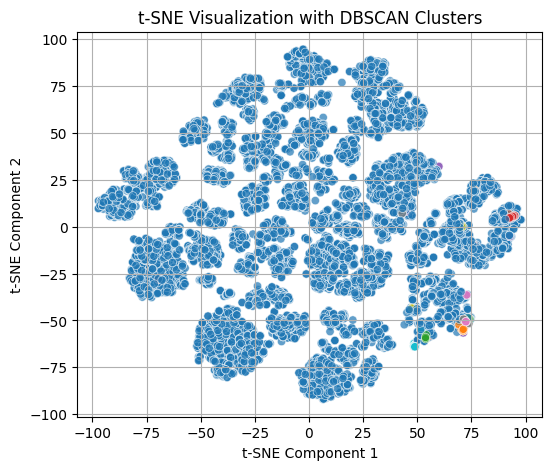

In [28]:
# Plot the t-SNE results with DBSCAN labels
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='DBSCAN_Cluster',
    palette='tab10',
    alpha=0.7,
    legend=False
)
plt.title('t-SNE Visualization with DBSCAN Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

<b><font color='darkgreen'>Insights:</font></b>

<b>The Silhouette Score for DBSCAN is 0.5693</b>, indicating relatively well-defined clusters. <b>However, the t-SNE plot reveals a significant issue: almost all the data points are grouped into a single dominant cluster (Cluster 0)</b>, with only a small number of points forming the remaining clusters. This suggests that while DBSCAN has identified clear groupings in terms of density, it may not be effectively capturing the underlying structure or diversity in the data. The predominance of one cluster could indicate that the DBSCAN hyperparameters (such as eps and min_samples) may need adjustment to better distinguish more granular clusters. Alternatively, it might suggest that the dataset lacks natural separation between distinct groups.

### <b>Part V. Evaluation</b>
- Compare all the models implemented with Silhouette Score

<b><font color='darkblue'>Gener a Dictionary with Model Names and Scores</font></b>

Each key is a column name, and the values are lists of model names and their corresponding Silhouette Scores.


In [29]:
# Create a dictionary with model names and their Silhouette Scores
silhouette_scores = {
    'Model': [
        'K-Means (Original Data)',
        'K-Means (PCA-Reduced Data)',
        'Gaussian Mixture Model',
        'Agglomerative Clustering',
        'DBSCAN'
    ],
    'Silhouette Score': [
        silhouette_original,
        silhouette_pca_15,
        silhouette_gmm,
        silhouette_agglo,
        silhouette_dbscan
    ]
}

In [30]:
# Create a DataFrame
silhouette_df = pd.DataFrame(silhouette_scores)

silhouette_df

,Model,Silhouette Score
0,K-Means (Original Data),0.154373
1,K-Means (PCA-Reduced Data),0.200812
2,Gaussian Mixture Model,0.137099
3,Agglomerative Clustering,0.120076
4,DBSCAN,0.569342


<b><font color='darkgreen'>Insights:</font></b>

After generating the comparison table of Silhouette Scores for the different clustering algorithms, it is clear that the clustering results are not particularly strong across the methods tested. <b>K-Means on PCA-reduced data</b> showed a slight improvement over the original data (Silhouette Score of <b>0.2008</b> vs. <b>0.1544</b>), but the scores are still low, indicating poor cluster separation and cohesion. Both <b>Gaussian Mixture Model (GMM)</b> and <b>Agglomerative Clustering</b> resulted in even lower Silhouette Scores (<b>0.1371</b> and <b>0.1201</b>, respectively), with t-SNE visualizations showing significant overlap between clusters, suggesting these algorithms struggled to find distinct groupings in the data.

Notably, <b>DBSCAN</b> achieved a higher Silhouette Score of <b>0.5693</b>; however, this is somewhat misleading as the majority of data points were assigned to a single dominant cluster, with only a few points forming smaller clusters. This indicates that while DBSCAN identified dense regions, it did not capture meaningful subdivisions within the data.

In conclusion, the consistently low Silhouette Scores and overlapping clusters suggest that the dataset may not have well-defined clusters detectable by these algorithms with the current parameters. Further exploration, such as tuning hyperparameters, trying different clustering techniques, or even performing additional feature engineering, may be necessary to uncover any underlying patterns or improve clustering performance.

### <b>Part VI. Cluster Analysis</b>
- Analyzing clusters based on feature means

<b>We will focus our cluster analysis on the K-Means clustering with PCA-reduced data (15 components) in this situation. Here is why:</b>

- DBSCAN, while having a higher Silhouette Score, resulted in most data points being assigned to a single cluster, which doesn't provide meaningful segmentation for analysis.
- K-Means with PCA (15 components) has the highest Silhouette Score among the clustering algorithms you've implemented, excluding DBSCAN. Although not very high, indicates better cluster separation compared to other algorithms within our implemented methods.

In [31]:
# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans_pca_labels_15

In [32]:
# Analyze clusters by looking at the mean values of features in each cluster
cluster_summary = df.groupby('Cluster').mean()

# Create a DataFrame
cluster_summary_df = pd.DataFrame(cluster_summary)

print("K-Means Cluster with PCA15 Analysis:")
cluster_summary_df

K-Means Cluster with PCA15 Analysis:


,Intuition_Encoded,Age,Income,Employment_Status,High_Expectation,Industry_Experience,Highest_Degree_Ordinal,Hours_Learning_Weekly,Months_Programming,Money_Spent,...,Replacable_Job_Potential,Study_Field_Computer-related,Study_Field_Not applicable,Study_Field_Other Science & Engineering,Study_Field_Others,Field_Working_Education,Field_Working_Others,Field_Working_Self-employed,Field_Working_Software development and IT,Field_Working_unemployed
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.787755,29.249433,1.310658,0.894331,0.712472,0.642630,4.021315,12.397279,50.972880,2331.737705,...,6.307937,0.407710,0.109297,0.252608,0.230385,0.018141,0.061678,0.000000,0.900227,0.019955
1,2.551572,22.244613,0.511657,0.038149,0.546803,0.009714,4.317026,13.431650,9.673369,290.478220,...,8.499117,0.202402,0.371600,0.212822,0.213176,0.009714,0.019428,0.000000,0.018191,0.952667
2,2.674349,31.280219,1.487316,0.907644,0.731719,0.015420,4.174432,9.420992,8.435762,335.970347,...,5.744487,0.085392,0.194827,0.341569,0.378213,0.109932,0.837175,0.000166,0.032001,0.020726


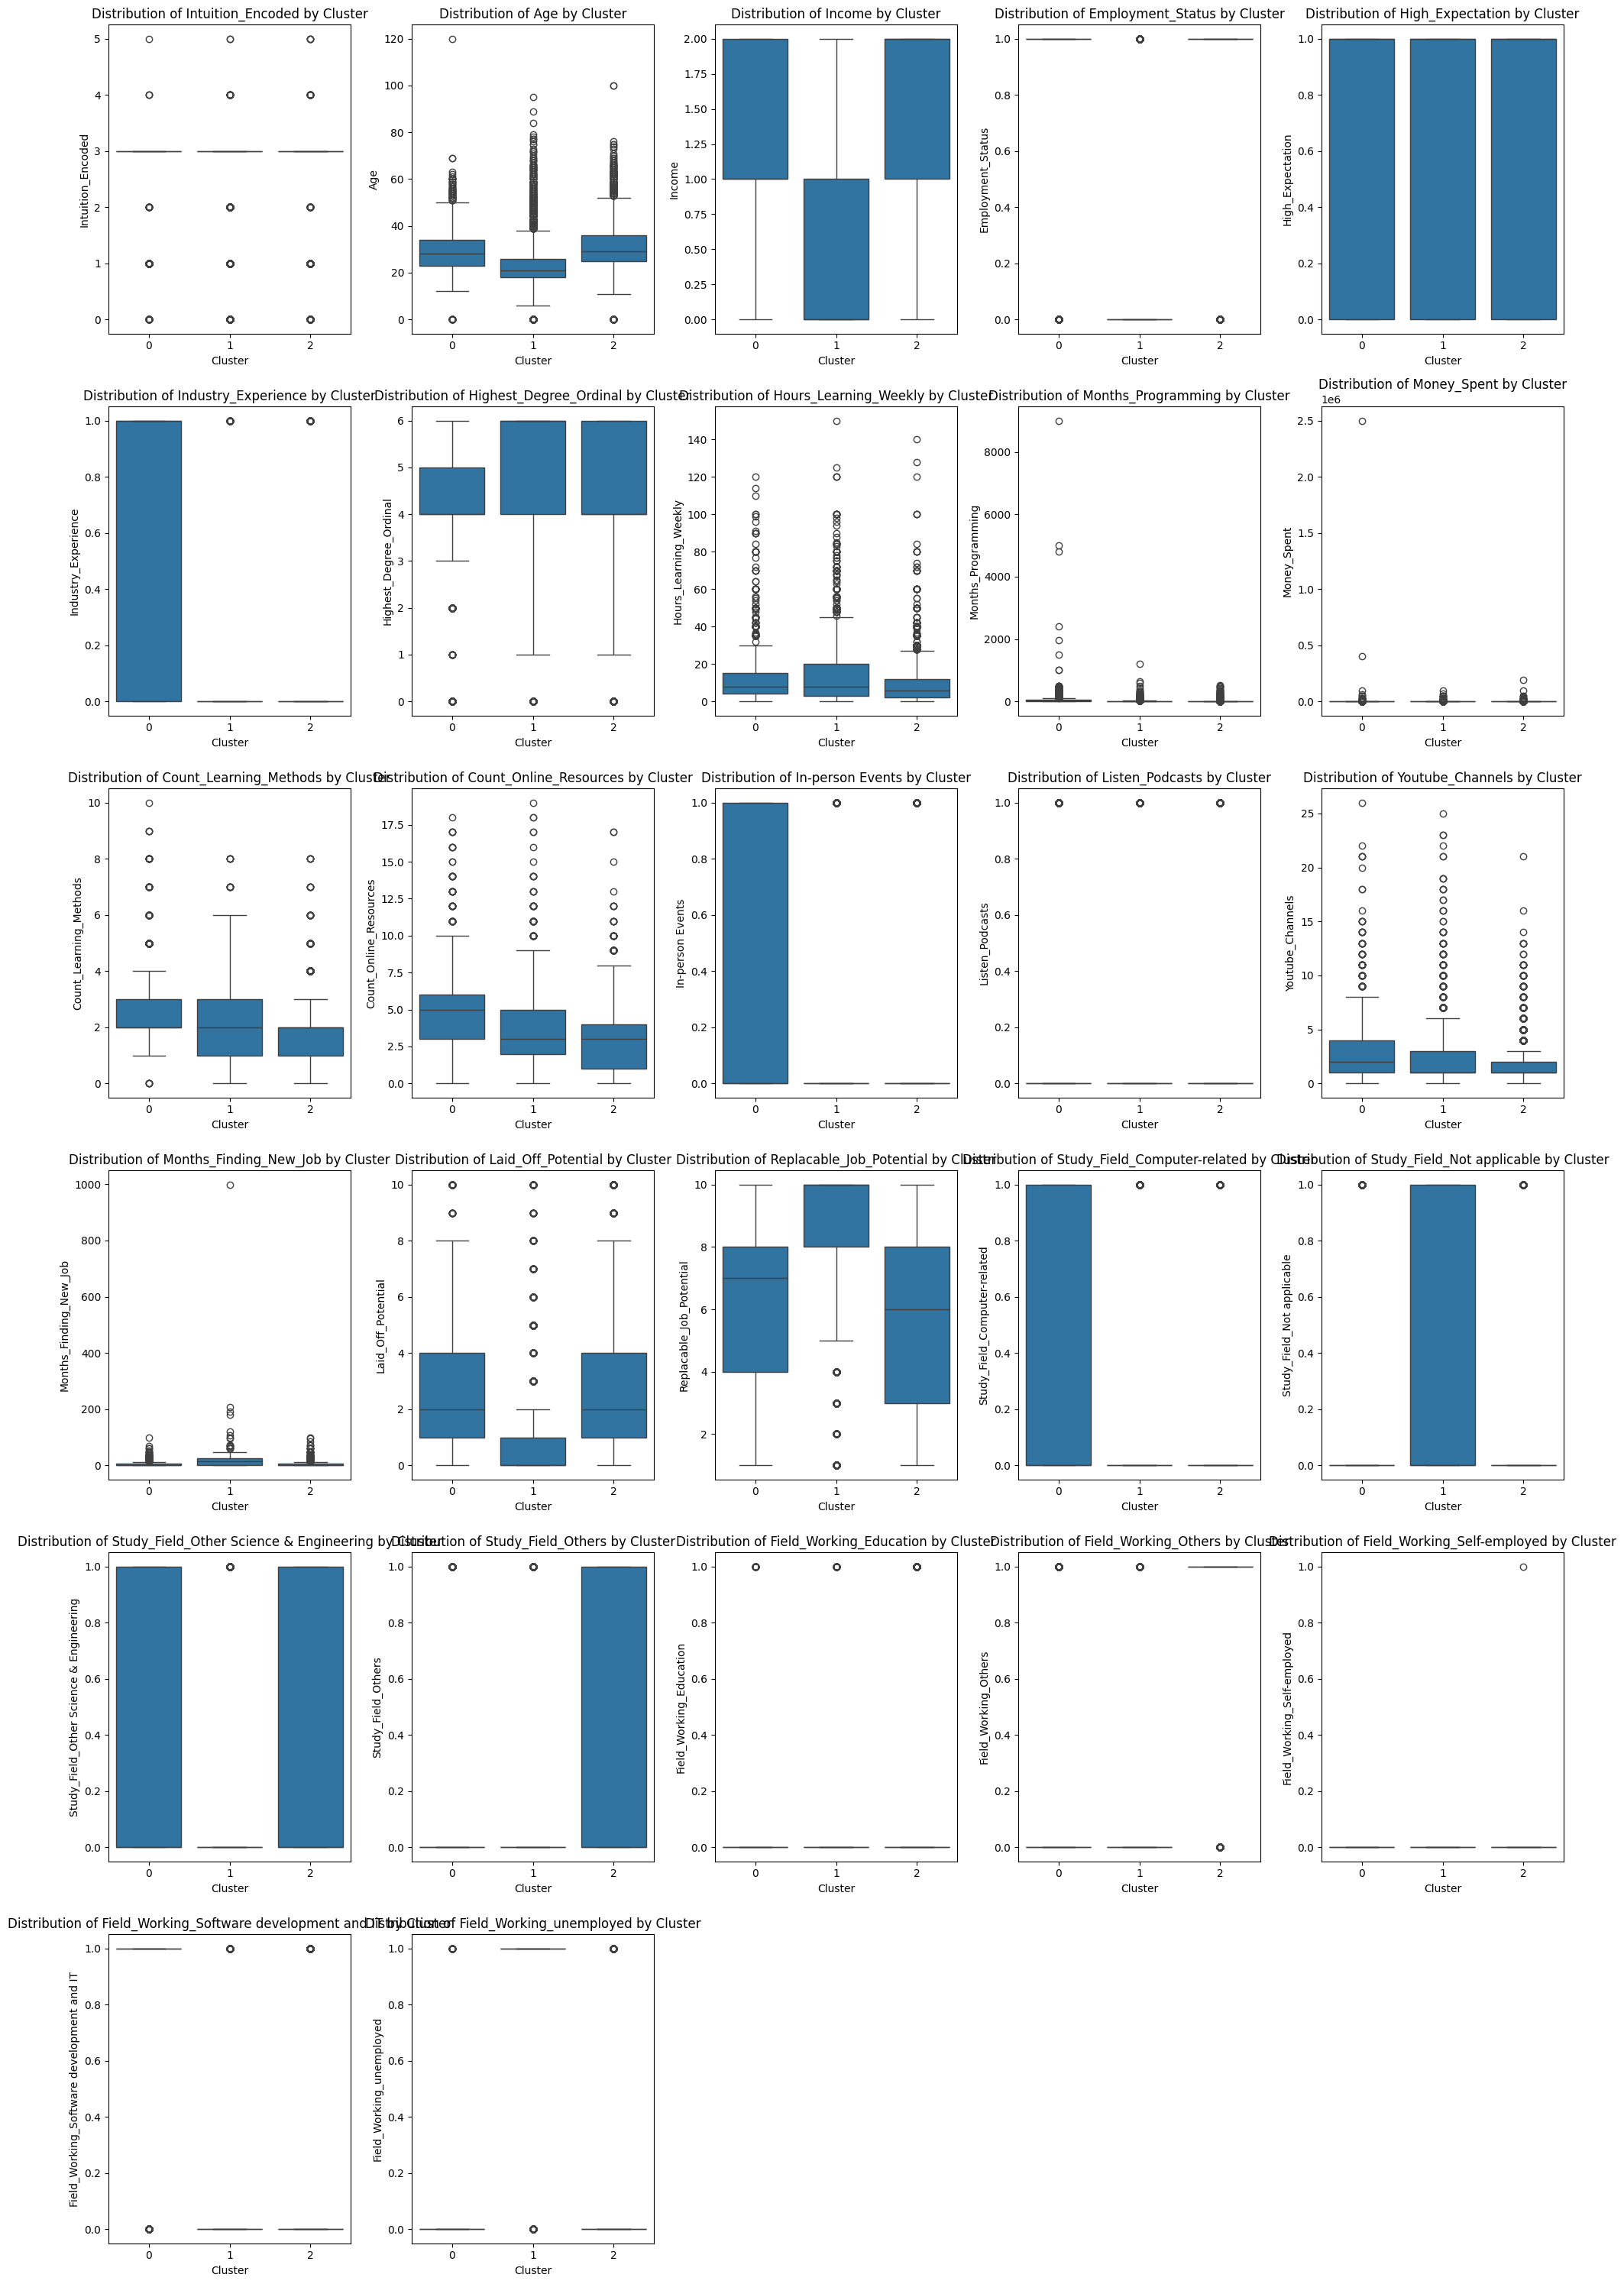

In [33]:
import math

features = df.columns.drop('Cluster')  # Exclude the 'Cluster' column
num_features = len(features)
plots_per_row = 5  # Number of subplots per row
num_rows = math.ceil(num_features / plots_per_row)

# Create subplots grid
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

# Remove any empty subplots
if len(axes) > len(features):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<b><font color='darkgreen'>Insights:</font></b>

This analysis uses K-Means clustering with 15 PCA components and displays the distribution of several features across the three identified clusters. Here's a breakdown of insights based on the provided box plots and statistics:

<b><font color='darkgreen'>Cluster 0:</font></b>

<font color='green'>Fact:</font>
- Age: Average age is 29.25, indicating mid-career individuals.
- Income: This group has a moderate income level (1.31), and most members are employed (Employment_Status = 0.89).
- Highest Degree: The average degree ordinal is 4.02, which corresponds closely to a Bachelor's degree based on the degree mapping. This suggests that most individuals in this cluster hold a Bachelor’s degree, with some potentially having Associate’s degrees or even Master's degrees.
- Tech Engagement: With 40.77% having a computer-related study field, and 90% working in software development or IT, this cluster represents tech professionals.
- Months Programming: Individuals in this cluster have extensive programming experience, with an average of 51 months (4+ years).

<b>Overall</b>: Cluster 0 is a group of mid-career, tprofessionals who are actively engaged in learning and working in high-paying software development/IT roles.

<font color='green'>Learning Habits:</font>
- Learning Engagement: On average, individuals in this cluster spend 12.4 hours per week on learning and have relatively high expenditures on learning resources (average of 2331.7), suggesting a focus on continuous development.
- Count_Learning_Methods: The median count of learning methods is around 2-3 methods, indicating a balanced and diverse approach to learning.
- Count_Online_Resources: The median number of online resources used is about 5, indicating moderate engagement with digital learning platforms.
- In-person Events: This cluster has overwhelming participation in in-person events, suggesting that these individuals highly value face-to-face learning or networking opportunities.
- Youtube_Channels: Individuals in this cluster engage with 4-5 YouTube channels on average, with some using up to 25 channels, indicating heavy reliance on YouTube for educational content.
-  Listen_Podcasts: Across all clusters, there seems to be very little engagement with podcasts.

<b><font color='darkgreen'>Cluster 1:</font></b>

<font color='green'>Fact:</font>
- Age: This is the youngest group, with an average age of 22.24, likely early-career individuals or students.
- Income and Employment: With a low average income (0.51) and very low employment status (Employment_Status = 0.038), this group struggles with employment or is still in school.
- Study Field: Around 20.24% of this group has a computer-related study field, while 37.16% come from other non-related fields.
- Tech Employment: Very few members of this cluster work in software development/IT (1.82%), but most are unemployed (Employment_Status = 0.95).

<b>Overall</b>: Cluster 1 represents younger, early-career individuals (or students) who are heavily focused on learning but face high unemployment rates and low income.

<font color='green'>Learning Habits:</font>
- Learning Engagement: Although they spend 13.43 hours per week on learning (higher than Cluster 0), they spend the least amount of money on learning resources ($290.48), indicating they may rely on free or low-cost educational tools.
- Count_Learning_Methods: This cluster shows a similar pattern to Cluster 0, with individuals using multiple learning methods. However, there are more outliers in this cluster using up to 6 or 7 methods, indicating a more varied approach to education.
- Count_Online_Resources: Similar to Cluster 0, but with slightly fewer online resources (median around 4), suggesting a slightly lower usage of online resources.
- In-person Events: Theis cluster show almost no participation in in-person events, indicating that they may prefer online learning or have fewer opportunities to attend such events.
- Youtube_Channels: A similar trend, with a slightly lower median engagement, but also with many outliers who use numerous YouTube channels for learning.
-  Listen_Podcasts: Across all clusters, there seems to be very little engagement with podcasts.

<b><font color='darkgreen'>Cluster 2:</font></b>

<font color='green'>Fact:</font>
- Age: This is the oldest group, with an average age of 31.28.
- Income: Members of this cluster have the highest income (1.49), and the majority are employed (Employment_Status = 0.91).
- Study Fields: Only 8.54% have a computer-related study field, and most come from other fields such as science & engineering (34.16%).
- Field of Work: Interestingly, a significant portion of this group (83.7%) works in fields other than IT or education, indicating this group may represent mid-career professionals in non-tech industries.

<b>Overall</b>: Cluster 2 consists of experienced, high-income individuals working in a wide range of non-tech fields. They focus less on continuous learning compared to the tech-heavy Cluster 0.

<font color='green'>Learning Habits:</font>
- Learning Engagement: Although this cluster spends less time on learning weekly (9.42 hours) compared to Clusters 0 and 1, they still allocate a moderate amount on resources ($335.97).
- Count_Learning_Methods: The fewest number of learning methods are used here, with the median being around 2 methods, suggesting that individuals in this cluster rely on a limited number of resources for learning.
- Count_Online_Resources: The smallest number of online resources used (median around 3), indicating that this group has limited interaction with online learning platforms compared to the other clusters.
- In-person Events: Theis cluster show almost no participation in in-person events, indicating that they may prefer online learning or have fewer opportunities to attend such events.
- Youtube_Channels: The lowest engagement, with a median of around 3 channels, indicating that this cluster is less reliant on YouTube for learning.
-  Listen_Podcasts: Across all clusters, there seems to be very little engagement with podcasts.

<b><font color='darkgreen'>Thoughts:</font></b>

The analysis of these three clusters derived from K-Means clustering using 15 PCA components aligns well with real-world trends and provides actionable insights. Cluster 0 represents mid-career tech professionals who are highly engaged in both their work and continuous learning, reflecting their desire to stay competitive in the rapidly evolving tech industry. Cluster 1, on the other hand, consists of younger individuals or students who are heavily focused on learning but are yet to establish themselves in the workforce, indicating a need for practical, industry-relevant experience. Lastly, Cluster 2, comprised of experienced professionals in non-tech fields, highlights the importance of cross-skilling, as these individuals are less engaged in learning but could benefit from integrating tech knowledge into their existing domains. The clustering results make sense intuitively, showcasing distinct career stages and learning behaviors. These insights not only validate the clustering approach but also offer valuable recommendations for tailored learning paths, mentorship, and professional development strategies across the clusters.



<b><font color='darkgreen'>Recommendations:</font></b>

<b><font color='darkgreen'>Cluster 0 (Mid-career Tech Professionals)</font></b>
- <b>Continue Professional Growth</b>: Since these individuals are already spending a significant amount of time and resources on learning, offering more advanced industry certifications, workshops, and networking opportunities will help them continue to grow.
- <b>Advanced Tech Topics</b>: As they are already proficient in tech, offering specialized courses on emerging trends like AI, machine learning, or cloud computing could add value.
- <b>Mentorship Roles</b>: Cluster 0 could be encouraged to act as mentors for Cluster 1 (early-career individuals or students) to share practical industry knowledge and best practices, fostering a collaborative learning environment.

<b><font color='darkgreen'>Cluster 1 (Early-career Individuals or Students)</font></b>
- <b>Practical Industry Exposure</b>: To complement their theoretical knowledge, individuals in Cluster 1 would benefit from more hands-on, industry-relevant learning experiences. Internships, project-based learning, and interactions with professionals from Cluster 0 can help them bridge the gap between academia and industry.
- <b>Guided Learning Pathways</b>: Creating structured learning paths tailored to early-career professionals could help them focus on key skills needed in the workforce, including soft skills like communication, teamwork, and problem-solving.
- <b>Affordable Learning Resources</b>: As they are budget-conscious, it’s crucial to provide access to affordable or free resources, including online coding platforms, webinars, and open-source projects to boost their employability.

<b><font color='darkgreen'>Cluster 2 (Mid-career Non-tech Professionals)</font></b>
- <b>Cross-skilling in Tech</b>: Since many individuals in Cluster 2 work in fields outside of IT, providing cross-skilling opportunities focused on tech literacy (e.g., data analysis, digital tools, or even basic programming) could enhance their skillset and help them integrate tech solutions into their non-tech industries.
- <b>Leverage Knowledge from Cluster 0</b>: Cluster 2 can benefit from learning from Cluster 0’s experience with software development and IT. Collaborating with Cluster 0 professionals through workshops or learning communities could introduce Cluster 2 to tech-related concepts, adding value to their existing expertise.
- <b>Targeted Learning Opportunities</b>: Offering shorter, more focused learning programs that align with their current fields (e.g., tech for finance, healthcare, or engineering) would be more attractive, as they are less engaged in learning compared to Clusters 0 and 1.
- <b>Tech-enabled Solutions</b>: Introducing them to how tech solutions can be applied to their domain can provide immediate value. Courses in digital transformation, automation, and data-driven decision-making could help them stay competitive in their fields.

------

<b><font color='darkgreen'>General Recommendations Across Clusters:</font></b>
- <b>Create a Learning Ecosystem</b>: Encourage knowledge sharing between clusters, where early-career individuals (Cluster 1) can learn from the experience of mid-career professionals in both tech (Cluster 0) and non-tech fields (Cluster 2). This can be facilitated through mentorship programs, workshops, and networking events.
- <b>Tailored Learning Resources</b>: Design learning programs that cater to the specific needs and career stages of each cluster. For example, Cluster 0 might benefit from leadership development programs, Cluster 1 from employability-focused learning, and Cluster 2 from tech integration skills.
- <b>Promote Continuous Learning</b>: Across all clusters, emphasizing the importance of lifelong learning will help individuals remain competitive and adaptable in a rapidly evolving job market. Online platforms, industry certifications, and professional communities can be leveraged for this purpose.